In [130]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [131]:
iris = load_iris(as_frame=True)
df = iris.frame.rename(
    columns={
        "sepal length (cm)": "sepal_length",
        "sepal width (cm)": "sepal_width",
        "petal length (cm)": "petal_length",
        "petal width (cm)": "petal_width",
        "target": "species_id",
    }
)
df["species"] = df["species_id"].map({i: n for i, n in enumerate(iris.target_names)})

df = df.drop(columns=["species_id"])

In [132]:
feature_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

In [133]:
print(df.shape)
display(df.head(3))
display(df.tail(3))
df.info()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [134]:
missing = df.isna().sum()
display(missing)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [135]:
species_count = df["species"].value_counts()
display(species_count)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [136]:
desc = df[feature_cols].describe()
display(Markdown("### Describe df"))
display(desc)

mean_median_abs = (
    (df[feature_cols].mean() - df[feature_cols].median())
    .abs()
    .sort_values(ascending=False)
)
mean_median_abs.name = "mean_median_abs"
std_sorted = df[feature_cols].std().sort_values(ascending=False)
std_sorted.name = "std_sorted"

display(mean_median_abs)
display(std_sorted)

### Describe df

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


petal_length    0.592000
petal_width     0.100667
sepal_width     0.057333
sepal_length    0.043333
Name: mean_median_abs, dtype: float64

petal_length    1.765298
sepal_length    0.828066
petal_width     0.762238
sepal_width     0.435866
Name: std_sorted, dtype: float64

In [137]:
var_std_range = pd.DataFrame(
    {
        "var": df[feature_cols].var(),
        "std": df[feature_cols].std(),
        "range": df[feature_cols].max() - df[feature_cols].min(),
    }
)
display(var_std_range)

,var,std,range
sepal_length,0.685694,0.828066,3.6
sepal_width,0.189979,0.435866,2.4
petal_length,3.116278,1.765298,5.9
petal_width,0.581006,0.762238,2.4


In [138]:
q = df[feature_cols].quantile([0.25, 0.5, 0.75]).T
q.columns = ["Q1", "Q2(median)", "Q3"]
q["IQR"] = q["Q3"] - q["Q1"]
display(q)

,Q1,Q2(median),Q3,IQR
sepal_length,5.1,5.80,6.4,1.3
sepal_width,2.8,3.00,3.3,0.5
petal_length,1.6,4.35,5.1,3.5
petal_width,0.3,1.30,1.8,1.5


In [139]:
skew_kurt = pd.DataFrame(
    {"skew": df[feature_cols].skew(), "kurtosis": df[feature_cols].kurt()}
)
display(skew_kurt)

,skew,kurtosis
sepal_length,0.314911,-0.552064
sepal_width,0.318966,0.228249
petal_length,-0.274884,-1.402103
petal_width,-0.102967,-1.340604


In [140]:
group_means = df.groupby("species")[feature_cols].mean()
display(group_means)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [141]:
group_median_std = df.groupby("species")[feature_cols].agg(["median", "std"])
display(group_median_std)

sepal_length           sepal_width           petal_length  \
                 median       std      median       std       median   
species                                                                
setosa              5.0  0.352490         3.4  0.379064         1.50   
versicolor          5.9  0.516171         2.8  0.313798         4.35   
virginica           6.5  0.635880         3.0  0.322497         5.55   

                     petal_width            
                 std      median       std  
species                                     
setosa      0.173664         0.2  0.105386  
versicolor  0.469911         1.3  0.197753  
virginica   0.551895         2.0  0.274650

In [142]:
petal_len_minmax = df.groupby("species")["petal_length"].agg(["min", "max"])
display(petal_len_minmax)

,min,max
species,,
setosa,1.0,1.9
versicolor,3.0,5.1
virginica,4.5,6.9


In [143]:
petal_len_iqr = df.groupby("species")["petal_length"].apply(
    lambda s: s.quantile(0.75) - s.quantile(0.25)
)
display(petal_len_iqr.to_frame("IQR"))

,IQR
species,
setosa,0.175
versicolor,0.600
virginica,0.775


In [144]:
top5_setosa = (
    df[df["species"] == "setosa"].sort_values("sepal_length", ascending=False).head(5)
)
display(top5_setosa)

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
18,5.7,3.8,1.7,0.3,setosa
15,5.7,4.4,1.5,0.4,setosa
36,5.5,3.5,1.3,0.2,setosa
33,5.5,4.2,1.4,0.2,setosa


In [145]:
big_petal = df[(df["petal_length"] >= 5.0) & (df["petal_length"] >= 1.8)]

count_big = len(big_petal)
dist_big = big_petal["species"].value_counts()

print("조건 만족 샘플 수: ", count_big)
display(dist_big)
display(big_petal.head(30))

조건 만족 샘플 수:  46


species
virginica     44
versicolor     2
Name: count, dtype: int64

,sepal_length,sepal_width,petal_length,petal_width,species
77,6.7,3.0,5.0,1.7,versicolor
83,6.0,2.7,5.1,1.6,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica


In [146]:
q90 = df["sepal_width"].quantile(0.9)
display(q90)
versi_top10 = df[(df["species"] == "versicolor") & df["sepal_width"] >= q90]
display(versi_top10)

np.float64(3.6099999999999994)

,sepal_length,sepal_width,petal_length,petal_width,species


In [147]:
species_order = (
    df.groupby("species")["petal_length"].mean().sort_values(ascending=False)
)

display(species_order)
print("정렬된 species:", species_order.index.tolist())

species
virginica     5.552
versicolor    4.260
setosa        1.462
Name: petal_length, dtype: float64

정렬된 species: [np.str_('virginica'), np.str_('versicolor'), np.str_('setosa')]


In [161]:
corr = df[feature_cols].corr()
display(corr)


corr_long = (
    corr.where(~np.eye(len(feature_cols), dtype=bool))
    .stack()
    .rename("corr")
    .reset_index()
    .rename(columns={"level_0": "var1", "level_1": "var2"})
)

corr_long["pair"] = corr_long.apply(
    lambda r: tuple(sorted([r["var1"], r["var2"]])), axis=1
)

corr_top2 = (
    corr_long.assign(abs_corr=corr_long["corr"].abs())
    .drop_duplicates("pair")
    .sort_values("abs_corr", ascending=False)
    .head(2)[["var1", "var2", "corr", "abs_corr"]]
)
display(corr_top2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


,var1,var2,corr,abs_corr
8,petal_length,petal_width,0.962865,0.962865
1,sepal_length,petal_length,0.871754,0.871754


In [163]:
corr_by_species = {sp: g[feature_cols].corr() for sp, g in df.groupby("species")}

for sp, c in corr_by_species.items():
    print(f"\n===== {sp} correlation ====")
    display(c)


===== setosa correlation ====


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000



===== versicolor correlation ====


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.525911,0.754049,0.546461
sepal_width,0.525911,1.000000,0.560522,0.663999
petal_length,0.754049,0.560522,1.000000,0.786668
petal_width,0.546461,0.663999,0.786668,1.000000



===== virginica correlation ====


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


In [165]:
cov = df[feature_cols].cov()
display(cov)

z = (df[feature_cols] - df[feature_cols].mean()) / df[feature_cols].std(ddof=1)
cov_of_z = z.cov()
display(cov_of_z)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [166]:
outlier_counts = {}

for col in feature_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outlier_counts[col] = ((df[col] < lower) | (df[col] > upper)).sum()

display(outlier_counts)

{'sepal_length': np.int64(0),
 'sepal_width': np.int64(4),
 'petal_length': np.int64(0),
 'petal_width': np.int64(0)}

In [ ]:
z = (df[feature_cols] - df[feature_cols].mean()) / df[feature_cols].std(ddof=1)

z_outlier = (z.abs() > 3).sum().sort_values(ascending=False)
display(z_outlier)



sepal_width     1
sepal_length    0
petal_length    0
petal_width     0
dtype: int64

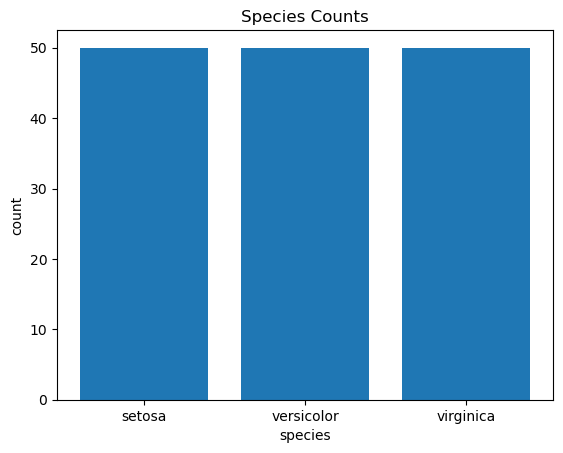

In [149]:
import matplotlib.pyplot as plt

counts = df["species"].value_counts()

plt.figure()
plt.bar(counts.index, counts.values)
plt.title("Species Counts")
plt.xlabel("species")
plt.ylabel("count")
plt.show()

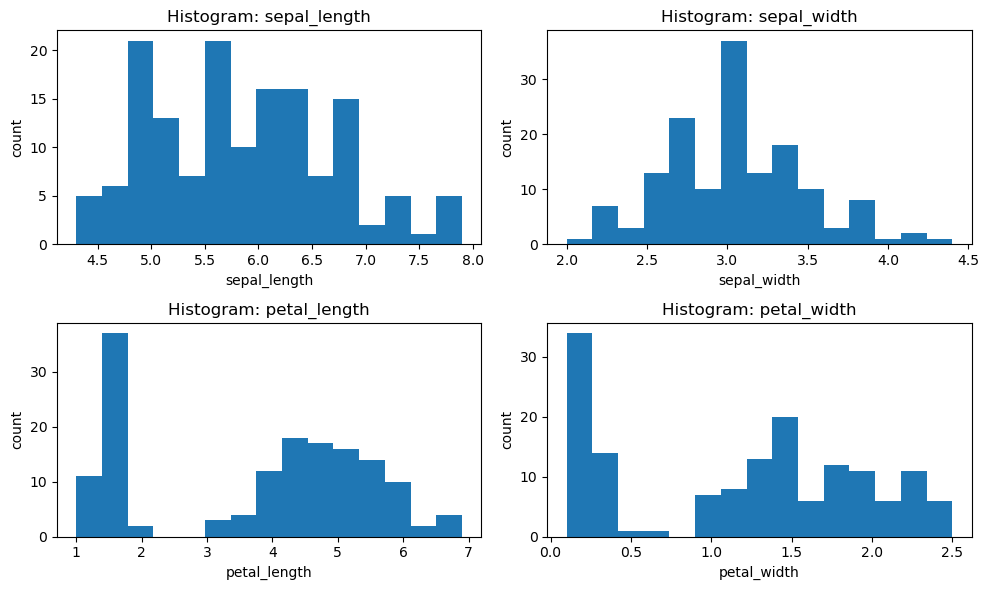

In [172]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.ravel()

for ax, col in zip(axes, feature_cols):
    ax.hist(df[col], bins=15)
    ax.set_title(f"Histogram: {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("count")

plt.tight_layout()
plt.show()

C:\Users\mun03\AppData\Local\Temp\ipykernel_45940\3823517281.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=species_order, showfliers=True)


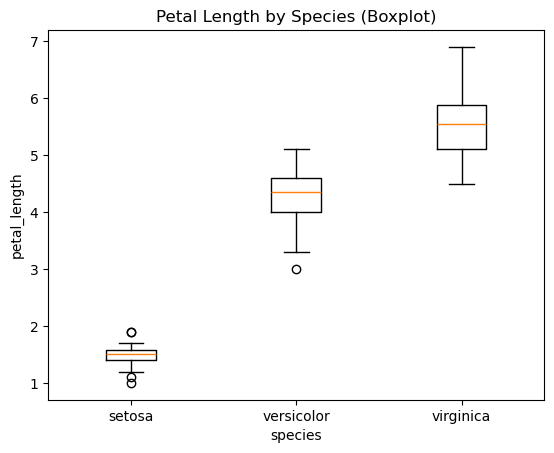

In [151]:
species_order = sorted(df["species"].unique())
data = [df.loc[df["species"] == sp, "petal_length"] for sp in species_order]

plt.figure()
plt.boxplot(data, labels=species_order, showfliers=True)
plt.title("Petal Length by Species (Boxplot)")
plt.xlabel("species")
plt.ylabel("petal_length")
plt.show()

C:\Users\mun03\AppData\Local\Temp\ipykernel_45940\4275370815.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=species_order, showfliers=True)
C:\Users\mun03\AppData\Local\Temp\ipykernel_45940\4275370815.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=species_order, showfliers=True)
C:\Users\mun03\AppData\Local\Temp\ipykernel_45940\4275370815.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=species_order, showfliers=True)
C:\Users\mun03\AppData\Local\Temp\ipykernel_45940\4275370815.py:8: MatplotlibDeprecationWarning: The 'labels' paramete

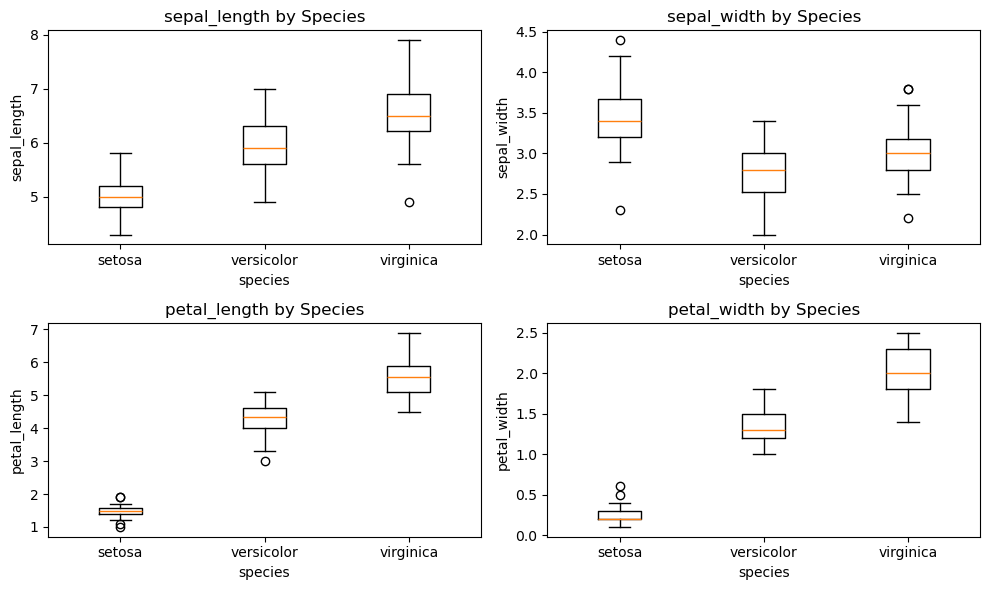

In [152]:
species_order = sorted(df["species"].unique())

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.ravel()

for ax, col in zip(axes, feature_cols):
    data = [df.loc[df["species"] == sp, col] for sp in species_order]
    ax.boxplot(data, labels=species_order, showfliers=True)
    ax.set_title(f"{col} by Species")
    ax.set_xlabel("species")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

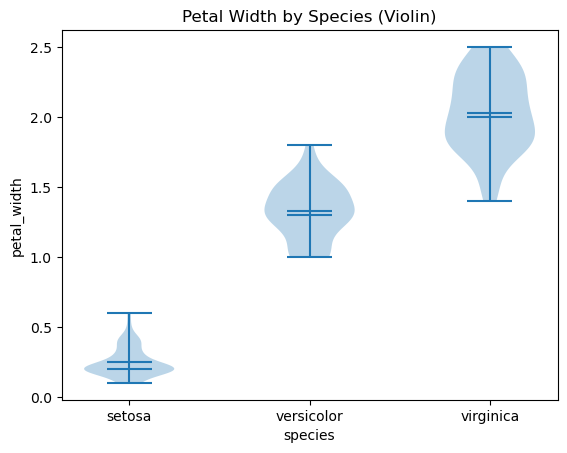

In [153]:
species_order = sorted(df["species"].unique())
data = [df.loc[df["species"] == sp, "petal_width"] for sp in species_order]

plt.figure()
plt.violinplot(data, showmeans=True, showmedians=True)
plt.xticks(range(1, len(species_order) + 1), species_order)
plt.title("Petal Width by Species (Violin)")
plt.xlabel("species")
plt.ylabel("petal_width")
plt.show()

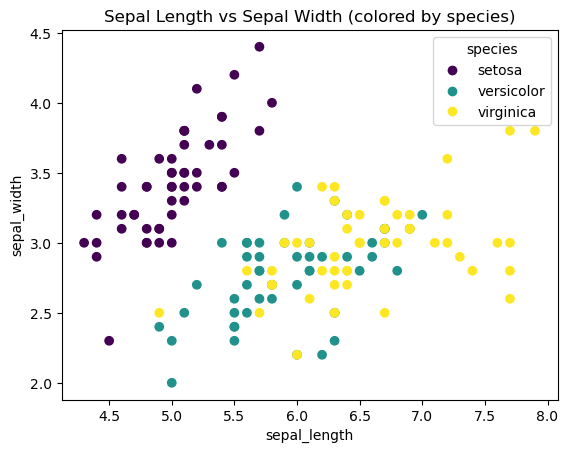

In [154]:
species_codes = df["species"].astype("category").cat.codes  # 0,1,2
species_names = df["species"].astype("category").cat.categories

plt.figure()
sc = plt.scatter(df["sepal_length"], df["sepal_width"], c=species_codes)
plt.title("Sepal Length vs Sepal Width (colored by species)")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")

# 범례(legend) 수동 구성
handles, _ = sc.legend_elements()
plt.legend(handles, species_names, title="species")
plt.show()

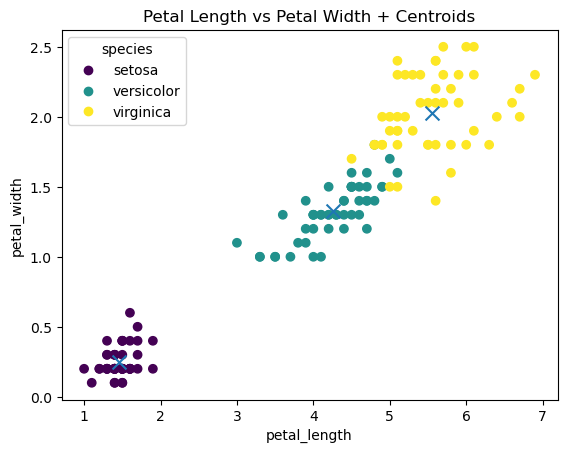

In [155]:
species_codes = df["species"].astype("category").cat.codes
species_names = df["species"].astype("category").cat.categories

plt.figure()
sc = plt.scatter(df["petal_length"], df["petal_width"], c=species_codes)
plt.title("Petal Length vs Petal Width + Centroids")
plt.xlabel("petal_length")
plt.ylabel("petal_width")

centroids = df.groupby("species")[["petal_length", "petal_width"]].mean()
plt.scatter(centroids["petal_length"], centroids["petal_width"], marker="x", s=100)

handles, _ = sc.legend_elements()
plt.legend(handles, species_names, title="species")
plt.show()

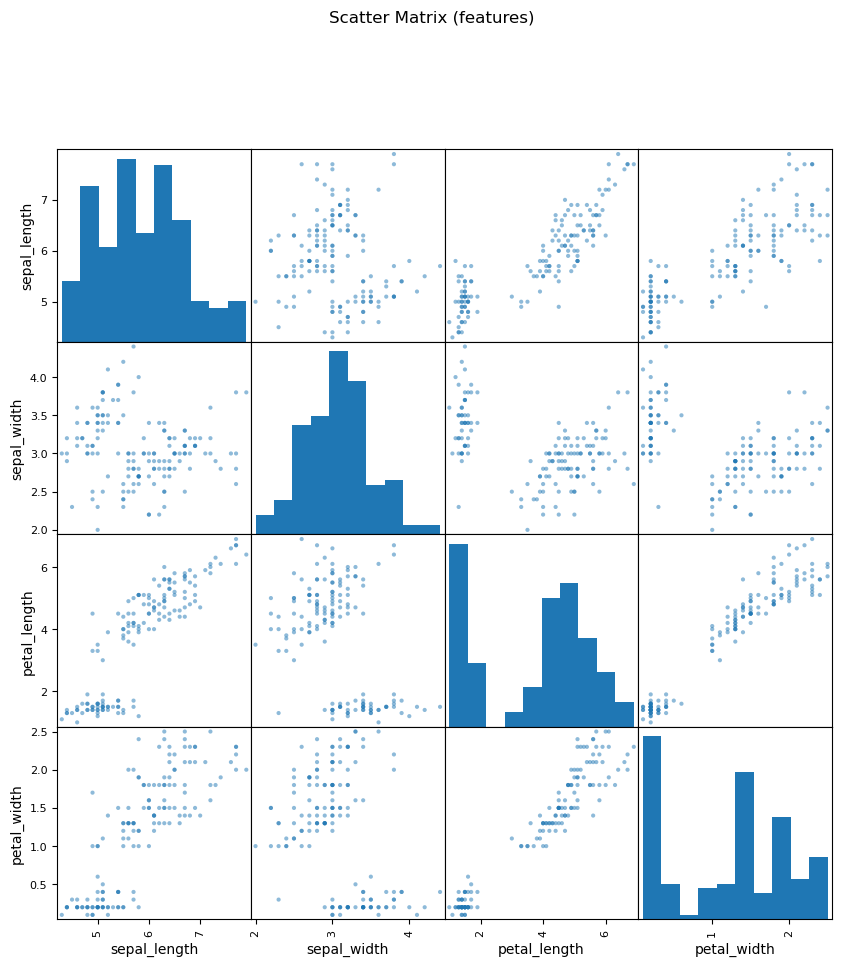

In [157]:
from pandas.plotting import scatter_matrix

axes = scatter_matrix(df[feature_cols], figsize=(10, 10), diagonal="hist")
plt.suptitle("Scatter Matrix (features)", y=1.02)
plt.show()

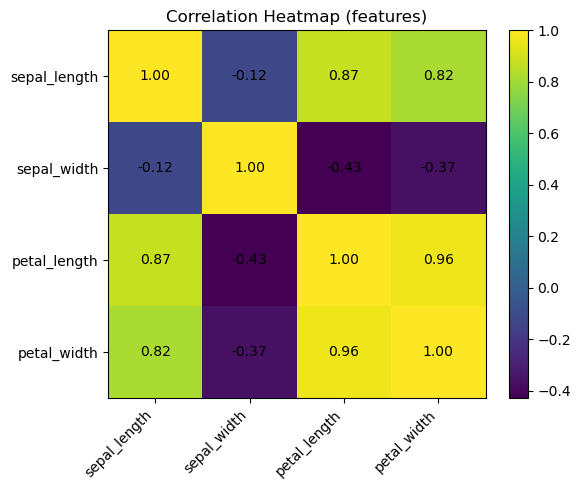

In [158]:
corr = df[feature_cols].corr().values

plt.figure(figsize=(6, 5))
plt.imshow(corr, aspect="auto")
plt.title("Correlation Heatmap (features)")
plt.colorbar()

plt.xticks(range(len(feature_cols)), feature_cols, rotation=45, ha="right")
plt.yticks(range(len(feature_cols)), feature_cols)

# 셀 값 텍스트(선택)
for i in range(len(feature_cols)):
    for j in range(len(feature_cols)):
        plt.text(j, i, f"{corr[i, j]:.2f}", ha="center", va="center")

plt.tight_layout()
plt.show()

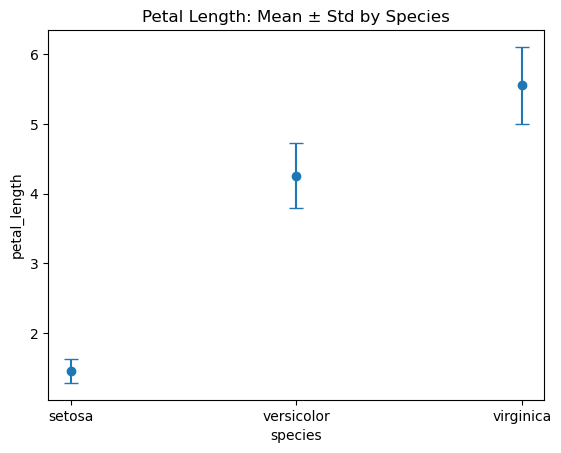

In [159]:
stats = df.groupby("species")["petal_length"].agg(["mean", "std"])
x = range(len(stats.index))

plt.figure()
plt.errorbar(x, stats["mean"], yerr=stats["std"], fmt="o", capsize=5)
plt.title("Petal Length: Mean ± Std by Species")
plt.xticks(x, stats.index)
plt.xlabel("species")
plt.ylabel("petal_length")
plt.show()